<center> <h1> Machine Learning Assignment</h1> </center>
<center> <h1> Gender Identification using Scikit-Learn </h1> </center>
<center> <h1> (Step-wise Tutorial)</h1> </center>
<br><br><br>
<center> <h1> Developed by Umair Ahmad </h1></center>

**Overview**<br>
The main objective of this tutorial is to provide the complete understanding of gender identification using Machine Learning toolkit (scikit-learn). In this tutorial, we are going to use the structured dataset about male and female. The dataset consists of set of input attributes (Height, Weight, Hair Length, Beard, Scarf) and ouput attribute (Male, Female). The task is to predict male and female from input attributes using Machine Learning algorithms. <br><br>
**Machine Learning Approach:** <br>The problem of Gender Identication is treated as a supervised learning approach because we going to use the labelled dataset.<br><br> **The Input and Output are:**<br>
<b> - Input:</b> Set of Attributes (Height, Weight, Hair Length, Beard, Scarf))<br><br>
<b> - Output:</b> Gender (Male/Female)<br><br>
<b> - Goal:</b> Learn from Input to predict Output<br><br>
    
<h3> Three Phases of Machine Learning: </h3><br><br>
<b>1. Training Phase </b>– Learn from Training Dataset.<br><br>
<b>2. Testing/Validation/Evaluation Phase</b> – Evaluate how well the algorithm learned.<br><br>
<b>3. Application Phase</b>– Use your learned/trained models in real world application.<br><br>


<center><h1> Table of Contents </h1></center>
<h2>PHASE 1 & 2: TRAINING AND TESTING </h2>

**Step 1:** Import Libraries<br><br>
**Step 2:** Read, Understand and Pre-process Train/Test Data<br><br>
**Step 2.1:** Read Data<br><br>
**Step 2.2:** Understand Data<br><br>
**Step 2.3:** Pre-process Data<br><br>
**Step 3:** Label Encoding for Train/Test Data<br><br>
**Step 4:** Feature Extraction – Changing Representation of features “from String to Feature-Vector”<br><br>
**Step 5:** Train Machine Learning Algorithms using Training Data<br><br>
**Step 6:** Evaluate Machine Learning Algorithms using Test Data<br><br>
**Step 7:** Selection of Best Model<br><br><br><br>


<h2> PHASE 3: APPLICATION PHASE</h2><br>
**Step 8:** Application Phase<br><br>
**Step 8.1:** Combine Dataset (Train + Test )¶<br><br>
**Step 8.2:** Train Best Model (see Step 7) on all data(Train+Test)<br><br>
**Step 8.3:** Save the Trained Model in Pickle File<br><br>
**Step 9:** Make predictions on unseen/new data<br><br>
**Step 9.1:** Load the Trained Model (saved in Step 8.3)<br><br>
**Step 9.2:** Take Input from User<br><br>
**Step 9.3:** Convert User Input into Feature Vector (Same as Feature Vector of Trained Model)<br><br>
**Step 9.4:** Apply Trained Model on Feature Vector of Unseen Dataset and Output Prediction (Male/Female) to User


# Step 1: Import Libraries

In [1]:
import re
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder            
from sklearn.svm import LinearSVC             
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier          
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

#from prettytable import PrettyTable   
from astropy.table import Table, Column 


# Step 2: Read, Understand & Pre-process Train/Test Data

In [2]:
# Open a file to read
train_dataset=pd.read_csv("Gender_Identification_train.csv")
count=len(train_dataset)
print(" Train instances :",count)
print("=======================================\n\n")
print(" Train Dataset :")
print("=======================================\n\n")
print (train_dataset)
print("\nAttributes Names in Train Dataset:\n==================================")
print(train_dataset.columns)

 Train instances : 6


 Train Dataset :


     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female

Attributes Names in Train Dataset:
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')


In [3]:
# Open a file to read
test_dataset=pd.read_csv("Gender_Identification_test.csv")
count=len(test_dataset)
print(" Test instances :",count)
print("=======================================\n\n")
print(" Test Dataset :")
print("=======================================\n\n")
print (test_dataset)
print("\nAttributes Names in Test Dataset:\n==================================")
print(test_dataset.columns)

 Test instances : 4


 Test Dataset :


   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female

Attributes Names in Test Dataset:
Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')


In [4]:
train_male_instance=train_dataset[train_dataset['gender']=='Male']
count=len(train_male_instance)
print(" Train male instances :",count)
print("=======================================\n\n")
print(train_male_instance)

train_female_instance=train_dataset[train_dataset['gender']=='Female']
count=len(train_male_instance)
print("\n\n Train Female instances :",count)
print("=======================================\n\n")
print(train_female_instance)

 Train male instances : 3


     height  weight   hair beard scarf gender
0  180.3000     196   Bald   Yes    No   Male
2  178.5000     200  Short    No    No   Male
4  175.2222     220  Short   Yes    No   Male


 Train Female instances : 3


   height  weight    hair beard scarf  gender
1   170.0     120    Long    No    No  Female
3   163.4     110  Medium    No   Yes  Female
5   165.0     150  Medium    No   Yes  Female


In [5]:
test_male_instance=test_dataset[test_dataset['gender']=='Male']
count=len(test_male_instance)
print(" Test male instances :",count)
print("=======================================\n\n")
print(test_male_instance)

test_female_instance=test_dataset[test_dataset['gender']=='Female']
count=len(test_male_instance)
print("\n\n Test Female instances :",count)
print("=======================================\n\n")
print(test_female_instance)

 Test male instances : 2


   height  weight  hair beard scarf gender
0   179.1     185  Long   Yes    No   Male
2   177.8     160  Bald    No    No   Male


 Test Female instances : 2


   height  weight    hair beard scarf  gender
1   160.5     130   Short    No    No  Female
3   161.1     100  Medium    No    No  Female


### Uderstanding Data via Graphs

Total number of 'Males' and 'Females' in Train Dataset:



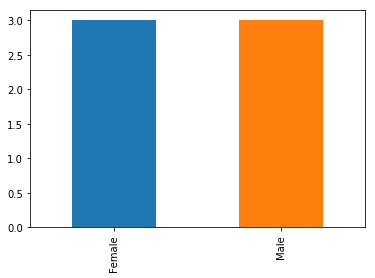

In [6]:
print("Total number of 'Males' and 'Females' in Train Dataset:\n\n================================================================================")
train_dataset['gender'].value_counts().plot('bar')
plt.show()

Total number of 'Males' and 'Females' in Test Dataset:



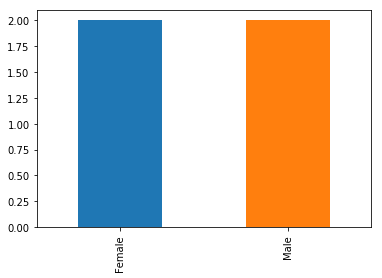

In [7]:
print("Total number of 'Males' and 'Females' in Test Dataset:\n\n================================================================================")
test_dataset['gender'].value_counts().plot('bar')
plt.show()

Number of people having various hair length in Train dataset:



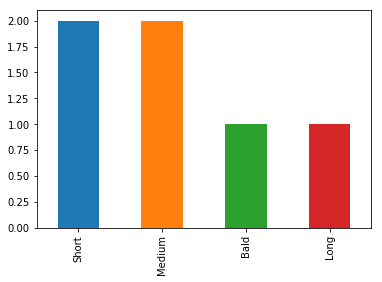

In [8]:
print("Number of people having various hair length in Train dataset:\n\n================================================================================")
train_dataset['hair'].value_counts().plot(kind='bar')
plt.show()

Number of people having various hair length in Test dataset:



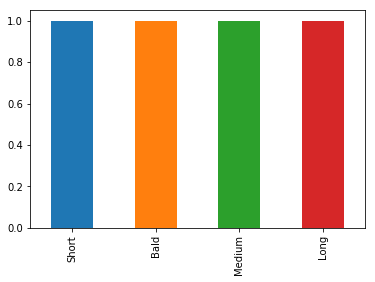

In [9]:
print("Number of people having various hair length in Test dataset:\n\n================================================================================")
test_dataset['hair'].value_counts().plot(kind='bar')
plt.show()

Number of people have/haven't beard in Train dataset::



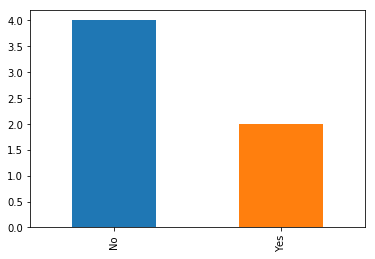

In [10]:
print("Number of people have/haven't beard in Train dataset::\n\n================================================================================")
train_dataset['beard'].value_counts().plot(kind='bar')
plt.show()

Number of people have/haven't beard in Test dataset::



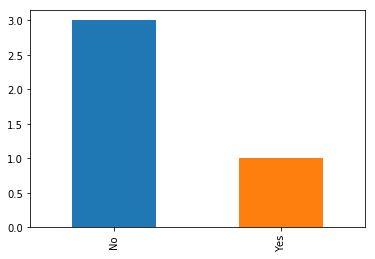

In [11]:
print("Number of people have/haven't beard in Test dataset::\n\n================================================================================")
test_dataset['beard'].value_counts().plot(kind='bar')
plt.show()

### Step 2.3: Pre-Process Data

In [12]:
print(" Train data before pre-processing:")
print("=================================\n\n")
print (train_dataset)
train_dataset=train_dataset.round(2)
print(" \n\nTrain data after pre-processing:")
print("=================================\n\n")
print (train_dataset)

 Train data before pre-processing:


     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female
 

Train data after pre-processing:


   height  weight    hair beard scarf  gender
0  180.30     196    Bald   Yes    No    Male
1  170.00     120    Long    No    No  Female
2  178.50     200   Short    No    No    Male
3  163.40     110  Medium    No   Yes  Female
4  175.22     220   Short   Yes    No    Male
5  165.00     150  Medium    No   Yes  Female


# Step 3: Label Encoding for Test/Train Data

#### Label encoding train dataset

In [13]:
#Gender Label Encodeing
print("Gender attribute Label Encoding in Train dataset:\n\n================================================\n")
le = LabelEncoder()
le.fit(train_dataset["gender"])
train_dataset['encoded_gender']=le.transform(train_dataset["gender"])
print(train_dataset[['gender','encoded_gender']])
output = open('gender_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

#Scarf Label Encodeing
print("\n\n\nScarf attribute Label Encoding in Train dataset:\n\n================================================\n")
le.fit(train_dataset["scarf"])
train_dataset['encoded_scarf']=le.transform(train_dataset["scarf"])
print(train_dataset[['scarf','encoded_scarf']])
output = open('scarf_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

#Beard Label Encodeing
print("\n\n\nBeard attribute Label Encoding in Train dataset:\n\n================================================\n")
le.fit(train_dataset["beard"])
train_dataset['encoded_beard']=le.transform(train_dataset["beard"])
print(train_dataset[['beard','encoded_beard']])
output = open('beard_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()


#hair Label Encodeing
print("\n\n\nHair attribute Label Encoding in Train dataset:\n\n================================================\n")
le.fit(train_dataset["hair"])
train_dataset['encoded_hair']=le.transform(train_dataset["hair"])
print(train_dataset[['hair','encoded_hair']])
output = open('hair_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

Gender attribute Label Encoding in Train dataset:


   gender  encoded_gender
0    Male               1
1  Female               0
2    Male               1
3  Female               0
4    Male               1
5  Female               0



Scarf attribute Label Encoding in Train dataset:


  scarf  encoded_scarf
0    No              0
1    No              0
2    No              0
3   Yes              1
4    No              0
5   Yes              1



Beard attribute Label Encoding in Train dataset:


  beard  encoded_beard
0   Yes              1
1    No              0
2    No              0
3    No              0
4   Yes              1
5    No              0



Hair attribute Label Encoding in Train dataset:


     hair  encoded_hair
0    Bald             0
1    Long             1
2   Short             3
3  Medium             2
4   Short             3
5  Medium             2


In [14]:
#Traning data comparsion after label encoding
print("Original Train Data:\n\n===============================================\n")
orignal_train_dataset=train_dataset[['height', 'weight' ,  'hair', 'beard','scarf','gender']]
print(orignal_train_dataset)

encoded_train_dataset=train_dataset[['height','weight' ,  'encoded_hair', 'encoded_beard','encoded_scarf','encoded_gender']]
print("\n\nTrain Data after Label Encoding:\n\n===============================================\n")
print(encoded_train_dataset)

Original Train Data:


   height  weight    hair beard scarf  gender
0  180.30     196    Bald   Yes    No    Male
1  170.00     120    Long    No    No  Female
2  178.50     200   Short    No    No    Male
3  163.40     110  Medium    No   Yes  Female
4  175.22     220   Short   Yes    No    Male
5  165.00     150  Medium    No   Yes  Female


Train Data after Label Encoding:


   height  weight  encoded_hair  encoded_beard  encoded_scarf  encoded_gender
0  180.30     196             0              1              0               1
1  170.00     120             1              0              0               0
2  178.50     200             3              0              0               1
3  163.40     110             2              0              1               0
4  175.22     220             3              1              0               1
5  165.00     150             2              0              1               0


#### Label encoding test dataset

In [15]:
#Scarf Label Encodeing
le.fit(test_dataset["scarf"])
test_dataset['encoded_scarf']=le.transform(test_dataset["scarf"])


#hair Label Encodeing
le.fit(test_dataset["hair"])
test_dataset['encoded_hair']=le.transform(test_dataset["hair"])


#Beard Label Encodeing
le.fit(test_dataset["beard"])
test_dataset['encoded_beard']=le.transform(test_dataset["beard"])

#Gender Label Encodeing
le.fit(test_dataset["gender"])
test_dataset['encoded_gender']=le.transform(test_dataset["gender"])

#Testing data comparsion after label encoding
print("Original test Data:\n\n===============================================\n")
orignal_test_dataset=test_dataset[['height', 'weight' ,  'hair', 'beard','scarf','gender']]
print(orignal_test_dataset)

encoded_test_dataset=test_dataset[['height','weight' ,  'encoded_hair', 'encoded_beard','encoded_scarf','encoded_gender']]
print("\n\ntest Data after Label Encoding:\n\n===============================================\n")
print(encoded_test_dataset)

Original test Data:


   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female


test Data after Label Encoding:


   height  weight  encoded_hair  encoded_beard  encoded_scarf  encoded_gender
0   179.1     185             1              1              0               1
1   160.5     130             3              0              0               0
2   177.8     160             0              0              0               1
3   161.1     100             2              0              0               0


# Step 4: Feature Extraction – Changing Representation of Data “from String to Vector”

In [16]:
x_train=train_dataset[['height','weight' ,  'encoded_hair', 'encoded_beard','encoded_scarf']]
y_train=train_dataset['encoded_gender']
x_test=test_dataset[['height','weight' ,  'encoded_hair', 'encoded_beard','encoded_scarf']]
y_test=test_dataset['encoded_gender']

# Step 5: Train Machine Learning Algorithms using Training Data

In [17]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\Umair\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(x_train, y_train)

C:\Users\Umair\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
svc=LinearSVC()
svc.fit(x_train,y_train)

C:\Users\Umair\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
brnoulli=BernoulliNB()
brnoulli.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# Step 6: Evaluate Machine Learning Algorithms using Test Data

In [21]:
print('Prediction using Logistic Regression:\n\n=====================================')
predicted_result=logisticRegr.predict(x_test)
LRaccuracy=accuracy_score(y_test, predicted_result)
predicted_result=le.inverse_transform(predicted_result)
real_result=le.inverse_transform(y_test)
test_dataset['predicted_gender']=predicted_result
print(test_dataset[['height', 'weight' ,  'hair', 'beard','scarf','gender','predicted_gender']])
print('\n\n\nAccuracy score : \n\n===============')
print(LRaccuracy)

Prediction using Logistic Regression:

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female



Accuracy score : 

0.75


In [22]:
print('Prediction using RandomForestClassifier:\n\n=====================================')
predicted_result=RF_Classifier.predict(x_test)
RF_accuracy=accuracy_score(y_test, predicted_result)
predicted_result=le.inverse_transform(predicted_result)
real_result=le.inverse_transform(y_test)
test_dataset['predicted_gender']=predicted_result
print(test_dataset[['height', 'weight' ,  'hair', 'beard','scarf','gender','predicted_gender']])
print('\n\n\nAccuracy score : \n\n===============')
print(RF_accuracy)

Prediction using RandomForestClassifier:

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female



Accuracy score : 

0.75


In [23]:
print('Prediction using Linear SVC:\n\n=====================================')
predicted_result=svc.predict(x_test)
svc_accuracy=accuracy_score(y_test, predicted_result)
predicted_result=le.inverse_transform(predicted_result)
real_result=le.inverse_transform(y_test)
test_dataset['predicted_gender']=predicted_result
print(test_dataset[['height', 'weight' ,  'hair', 'beard','scarf','gender','predicted_gender']])
print('\n\n\nAccuracy score : \n\n===============')
print(svc_accuracy)

Prediction using Linear SVC:

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female



Accuracy score : 

0.75


In [24]:
print('Prediction using BernoulliNB:\n\n=====================================')
predicted_result=brnoulli.predict(x_test)
bernoulli_accuracy=accuracy_score(y_test, predicted_result)
predicted_result=le.inverse_transform(predicted_result)
real_result=le.inverse_transform(y_test)
test_dataset['predicted_gender']=predicted_result
print(test_dataset[['height', 'weight' ,  'hair', 'beard','scarf','gender','predicted_gender']])
print('\n\n\nAccuracy score : \n\n===============')
print(bernoulli_accuracy)


Prediction using BernoulliNB:

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female



Accuracy score : 

1.0


# Step 7: Selection of Best Model

In [25]:
models={
    'LogisticRegression':LRaccuracy,
    'RandomForestClassifier':RF_accuracy,
    'LinearSVC':svc_accuracy,
    'BernoulliNB':bernoulli_accuracy
}
s="""Detailed Performance of all the models.
=======================================

+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|   LogisticRegression   |   0.75   |
| RandomForestClassifier |   0.75   |
|       LinearSVC        |   0.75   |
|      BernoulliNB       |   1.0    |
+------------------------+----------+


Best Model.
========================================
+-------------+----------+
|    Models   | Accuracy |
+-------------+----------+
| BernoulliNB |   1.0    |
+-------------+----------+"""
print(s)

Detailed Performance of all the models.

+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|   LogisticRegression   |   0.75   |
| RandomForestClassifier |   0.75   |
|       LinearSVC        |   0.75   |
|      BernoulliNB       |   1.0    |
+------------------------+----------+


Best Model.
+-------------+----------+
|    Models   | Accuracy |
+-------------+----------+
| BernoulliNB |   1.0    |
+-------------+----------+


# PHASE 3: APPLICATION PHASE

# Step 8: Application Phase

### Step 8.1: Combine Data (Train+Test)

In [26]:
print("""Train Features in form of Dataframe:
=======================================""")
print(encoded_train_dataset)

Train Features in form of Dataframe:
   height  weight  encoded_hair  encoded_beard  encoded_scarf  encoded_gender
0  180.30     196             0              1              0               1
1  170.00     120             1              0              0               0
2  178.50     200             3              0              0               1
3  163.40     110             2              0              1               0
4  175.22     220             3              1              0               1
5  165.00     150             2              0              1               0


In [27]:
print("""Test Features in form of Dataframe:
=======================================""")
print(encoded_test_dataset)

Test Features in form of Dataframe:
   height  weight  encoded_hair  encoded_beard  encoded_scarf  encoded_gender
0   179.1     185             1              1              0               1
1   160.5     130             3              0              0               0
2   177.8     160             0              0              0               1
3   161.1     100             2              0              0               0


In [28]:
print("""All Train and Test Dataset Features in form of DataFrame:
========================================================""")
encoded_combine_dataset=pd.concat([encoded_train_dataset, encoded_test_dataset])
print(encoded_combine_dataset)

All Train and Test Dataset Features in form of DataFrame:
   height  weight  encoded_hair  encoded_beard  encoded_scarf  encoded_gender
0  180.30     196             0              1              0               1
1  170.00     120             1              0              0               0
2  178.50     200             3              0              0               1
3  163.40     110             2              0              1               0
4  175.22     220             3              1              0               1
5  165.00     150             2              0              1               0
0  179.10     185             1              1              0               1
1  160.50     130             3              0              0               0
2  177.80     160             0              0              0               1
3  161.10     100             2              0              0               0


### Step 8.2: Train Best Model (see Step 7) on all features (Train+Test)

In [29]:
x_train=encoded_combine_dataset[['height','weight' ,  'encoded_hair', 'encoded_beard','encoded_scarf']]
y_train=encoded_combine_dataset['encoded_gender']
brnoulli=BernoulliNB()
brnoulli.fit(x_train,y_train)
predicted_result=brnoulli.predict(x_test)
bernoulli_accuracy=accuracy_score(y_test, predicted_result)
print('\n\n\nAccuracy score : \n\n===============')
print(bernoulli_accuracy)




Accuracy score : 

1.0


### Step 8.3: Save the trained model in Pickle file 

In [30]:
filename = 'finalized_model.sav'
pickle.dump(brnoulli, open(filename, 'wb'))

# Step 9: Make prediction on unseen/new data

### Step 9.1: Load the Trained Model (saved in Step 8.3) 

In [31]:
loaded_model = pickle.load(open(filename, 'rb'))
beard_encoder = pickle.load(open('beard_encoder.pkl', 'rb'))
scarf_encoder = pickle.load(open('scarf_encoder.pkl', 'rb'))
hair_encoder = pickle.load(open('hair_encoder.pkl', 'rb'))

### Step 9.2: Take Input from User

In [43]:
print("Please enter your Height here (centimeter):")
height=input()
print("Please enter your Weight here(kg):") 
weight=input()
print("Please enter your Hair Length here (Bald/Long/Short/Medium)")
hair=input()
print("Do you have beard? (Yes/No)")
beard=input()
print("Do you wear Scarf? (Yes/No)")
scarf=input()


Please enter your Height here (centimeter):
150
Please enter your Weight here(kg):
30
Please enter your Hair Length here (Bald/Long/Short/Medium)
Medium
Do you have beard? (Yes/No)
No
Do you wear Scarf? (Yes/No)
No


### Step 9.3: Convert User Input into Feature Vector (Same as Feature Vector of Trained Model) 

In [44]:
print("""
User input in Actual DataFrame form:
====================================""")
data = [[height,weight,hair,beard,scarf]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['height','weight','hair','beard','scarf'])
print(df)


User input in Actual DataFrame form:
  height weight    hair beard scarf
0    150     30  Medium    No    No


In [45]:
print("""
User input in Actual DataFrame form:

====================================""")
print(df)
print("""


User input in Encoded DataFrame form:
====================================

""")



df['encoded_beard']=beard_encoder.transform(df["beard"])

df['encoded_hair']=hair_encoder.transform(df["hair"])

df['encoded_scarf']=scarf_encoder.transform(df["scarf"])

encoded_app_dataset=df[['height','weight' ,  'encoded_hair', 'encoded_beard','encoded_scarf']]
print(encoded_app_dataset)


User input in Actual DataFrame form:

  height weight    hair beard scarf
0    150     30  Medium    No    No



User input in Encoded DataFrame form:


  height weight  encoded_hair  encoded_beard  encoded_scarf
0    150     30             2              0              0


### Step 9.4: Apply Trained Model on Feature Vector of Unseen Data and Output Prediction (Male/Female) to User

In [50]:
predicted_result=brnoulli.predict(encoded_app_dataset)
realresult=[0]
Accuracy=accuracy_score(realresult, predicted_result)
print("Accuracy=",Accuracy)
s="""+--------------------------------+
|        ** Prediction **        |
+--------------------------------+
|             result             |
+--------------------------------+"""
if(predicted_result==1):
    result="male"
else:
    result="female"
print(s.replace("result",result))


Accuracy= 1.0
+--------------------------------+
|        ** Prediction **        |
+--------------------------------+
|             female             |
+--------------------------------+


<center><h3> End of the Tutorial </h3></center>